<a href="https://colab.research.google.com/github/VitikaJain25/PandasRevision/blob/master/InterpretingDataUsingPandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
pd.__version__

'1.0.3'

In [3]:
import matplotlib
matplotlib.__version__

'3.2.1'

In [4]:
import numpy as np
np.__version__

'1.18.2'

In [5]:
import seaborn
seaborn.__version__

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


'0.10.0'

In [0]:
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
from google.colab import files  #To read file from local
import io
uploaded = files.upload()   # To upload file from local.

mall_data = pd.read_csv(io.BytesIO(uploaded['Mall_Customers.csv']))

Saving Mall_Customers.csv to Mall_Customers.csv


In [8]:
mall_data.head(5)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [9]:
average_income = mall_data['Annual Income (k$)'].mean()
average_income

60.56

In [10]:
# Adding another column
mall_data['above_average_income'] = (mall_data['Annual Income (k$)'] - average_income) > 0
mall_data.sample(5)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),above_average_income
165,166,Female,36,85,75,True
16,17,Female,35,21,35,False
94,95,Female,32,60,42,False
38,39,Female,36,37,26,False
191,192,Female,32,103,69,True


In [11]:
from google.colab import files  #To read file from local
import io
uploaded = files.upload()   # To upload file from local.
height_weight_data = pd.read_csv(io.BytesIO(uploaded['500_Person_Gender_Height_Weight_Index.csv']))

Saving 500_Person_Gender_Height_Weight_Index.csv to 500_Person_Gender_Height_Weight_Index.csv


In [12]:
height_weight_data.head(5)

,Gender,Height,Weight,Index
0,Male,174,96,4
1,Male,189,87,2
2,Female,185,110,4
3,Female,195,104,3
4,Male,149,61,3


In [13]:
# Dropping Column
height_weight_data.drop('Index', axis = 1, inplace = True)
height_weight_data.head(5)

,Gender,Height,Weight
0,Male,174,96
1,Male,189,87
2,Female,185,110
3,Female,195,104
4,Male,149,61


In [14]:
height_weight_data.shape

(500, 3)

In [15]:
# To check count of missing values
height_weight_data.isnull().sum()

Gender    0
Height    0
Weight    0
dtype: int64

**Measures of Central Tendency**





In [16]:
# To find minimum value for a Numerical column
min_height = height_weight_data['Height'].min()
min_height

140

In [17]:
# To find maximum value for a Numerical column
max_height = height_weight_data['Height'].max()
max_height

199

In [18]:
min_weight = height_weight_data['Weight'].min()
min_weight

50

In [19]:
max_weight = height_weight_data['Weight'].max()
max_weight

160

In [20]:
# To find range
range_of_height = max_height - min_height
range_of_height

59

In [21]:
mean_weight = height_weight_data['Weight'].mean()
mean_weight

106.0

In [22]:
median_weight = height_weight_data['Weight'].median()
median_weight

106.0

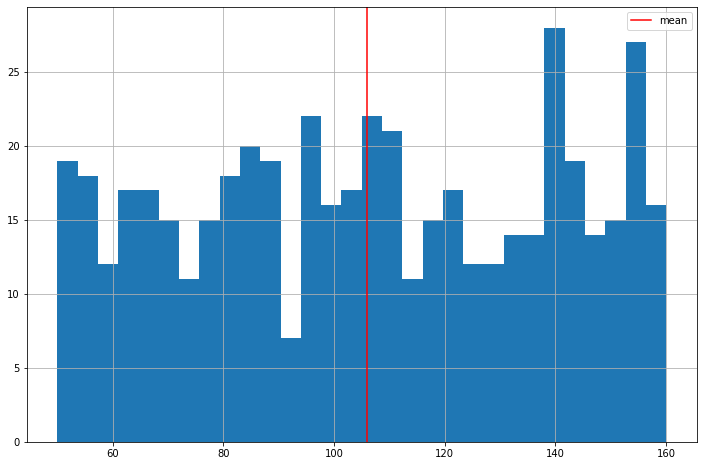

In [23]:
# Data Visualization
plt.figure(figsize = (12,8))
height_weight_data['Weight'].hist(bins = 30)
plt.axvline(mean_weight, color = 'r', label = 'mean')
plt.legend()

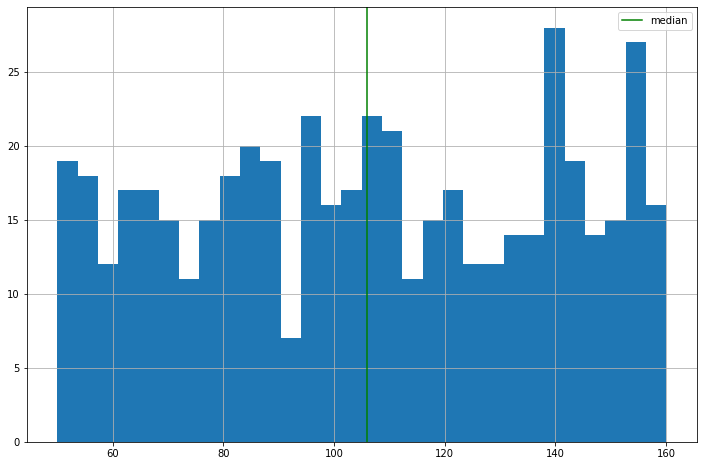

In [24]:
# Data Visualization
plt.figure(figsize = (12,8))
height_weight_data['Weight'].hist(bins = 30)
plt.axvline(median_weight, color = 'g', label = 'median')
plt.legend()

In [0]:
# Adding Outliers to Data
list_of_series = [pd.Series(['Male', 205, 460], index=height_weight_data.columns),
                  pd.Series(['Female', 202, 390], index=height_weight_data.columns),
                  pd.Series(['Female', 199, 410], index=height_weight_data.columns),
                  pd.Series(['Male', 202, 390], index=height_weight_data.columns),
                  pd.Series(['Female', 199, 410], index=height_weight_data.columns),
                  pd.Series(['Male', 200, 490], index=height_weight_data.columns)]

In [26]:
height_weight_data_updated = height_weight_data.append(list_of_series)
height_weight_data_updated.tail()

,Gender,Height,Weight
1,Female,202,390
2,Female,199,410
3,Male,202,390
4,Female,199,410
5,Male,200,490


In [27]:
# Mean is very sensitive to outliers than median
mean_weight_updated = height_weight_data_updated['Weight'].mean()
mean_weight_updated

109.78260869565217

In [28]:
# Median is not very sensitive to outliers
median_weight_updated = height_weight_data_updated['Weight'].median()
median_weight_updated

106.5

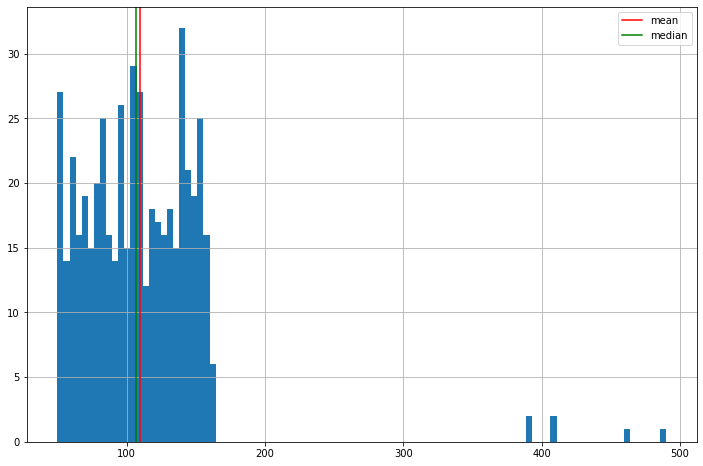

In [29]:
# Data Visualization
# We can see outliers
plt.figure(figsize = (12,8))
height_weight_data_updated['Weight'].hist(bins = 100)
plt.axvline(mean_weight_updated, color = 'r', label = 'mean')
plt.axvline(median_weight_updated, color = 'g', label = 'median')
plt.legend()

In [30]:
# Finding Mode
mode_weight = height_weight_data_updated['Weight'].mode()
mode_weight

0     50
1     80
2    104
dtype: int64

In [31]:
mean_height = height_weight_data['Height'].mean()
mean_height

169.944

In [32]:
median_height = height_weight_data['Height'].median()
median_height

170.5

In [33]:
mode_height = height_weight_data['Height'].mode().values[0]
mode_height

188

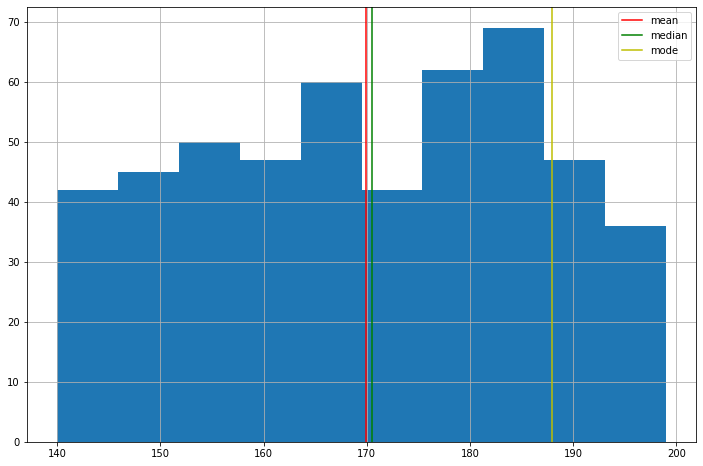

In [34]:
# Data Visualization
plt.figure(figsize = (12,8))
height_weight_data['Height'].hist()
plt.axvline(mean_height, color = 'r', label = 'mean')
plt.axvline(median_height, color = 'g', label = 'median')
plt.axvline(mode_height, color = 'y', label = 'mode')
plt.legend()

**Measures of Dispersion**

In [35]:
height_weight_data.shape

(500, 3)

In [36]:
# Storing total number of records
num_records = height_weight_data.shape[0]
num_records

500

In [37]:
# Copying the value of height data in seperate Dataframe.
height_data = height_weight_data[['Height']].copy()
height_data.head()

,Height
0,174
1,189
2,185
3,195
4,149


In [38]:
# Copying the value of weight data in seperate Dataframe.
weight_data = height_weight_data[['Weight']].copy()
weight_data.head()

,Weight
0,96
1,87
2,110
3,104
4,61


In [39]:
# New column "Counts_height" and "Counts_weight" with all ones.
# For calculating cumulative counts.
counts = [1] * num_records
height_data['counts_height'] = counts
weight_data['counts_weight'] = counts
height_data
# weight_data


,Height,counts_height
0,174,1
1,189,1
2,185,1
3,195,1
4,149,1
...,...,...
495,150,1
496,184,1
497,141,1
498,150,1


In [40]:
weight_data = weight_data.sort_values('Weight')
weight_data.tail()

,Weight,counts_weight
157,160,1
330,160,1
106,160,1
204,160,1
287,160,1


In [41]:
height_data = height_data.sort_values('Height')
height_data.tail()

,Height,counts_height
85,198,1
103,198,1
326,199,1
160,199,1
100,199,1


In [42]:
# To get frequency counts
height_data = height_data.groupby('Height', as_index=False).count()
height_data.head(10)

,Height,counts_height
0,140,8
1,141,8
2,142,9
3,143,3
4,144,5
5,145,9
6,146,9
7,147,7
8,148,5
9,149,5


In [43]:
# To get frequency counts
weight_data = weight_data.groupby('Weight', as_index=False).count()
weight_data.head(10)

,Weight,counts_weight
0,50,9
1,51,4
2,52,5
3,53,1
4,54,8
5,55,1
6,56,4
7,57,5
8,58,4
9,59,3


In [44]:
height_data['cumcounts_height'] = height_data['counts_height'].cumsum()
height_data.head(10)

,Height,counts_height,cumcounts_height
0,140,8,8
1,141,8,16
2,142,9,25
3,143,3,28
4,144,5,33
5,145,9,42
6,146,9,51
7,147,7,58
8,148,5,63
9,149,5,68


In [45]:
weight_data['cumcounts_weight'] = weight_data['counts_weight'].cumsum()
weight_data.head(10)

,Weight,counts_weight,cumcounts_weight
0,50,9,9
1,51,4,13
2,52,5,18
3,53,1,19
4,54,8,27
5,55,1,28
6,56,4,32
7,57,5,37
8,58,4,41
9,59,3,44


In [46]:
# We can invoke quantile function on any numeric column and mention the quantile you want (.25, .50. .75).
q1_height = height_weight_data['Height'].quantile(.25)
q1_height

156.0

In [47]:
# 75th Percentile
q3_height = height_weight_data['Height'].quantile(.75)
q3_height

184.0

In [48]:
# IQR not sesitive to outliers
iqr_range = q3_height - q1_height
iqr_range

28.0

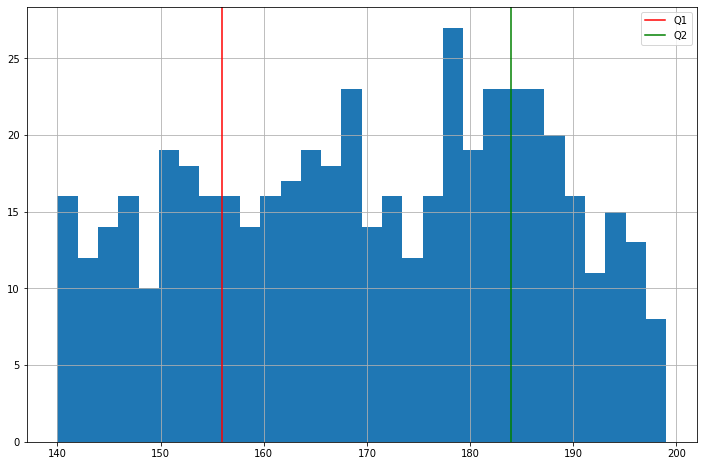

In [49]:
plt.figure(figsize = (12,8))
height_weight_data['Height'].hist(bins = 30)
plt.axvline(q1_height, color = 'r', label = 'Q1')
plt.axvline(q3_height, color = 'g', label = 'Q2')
plt.legend()

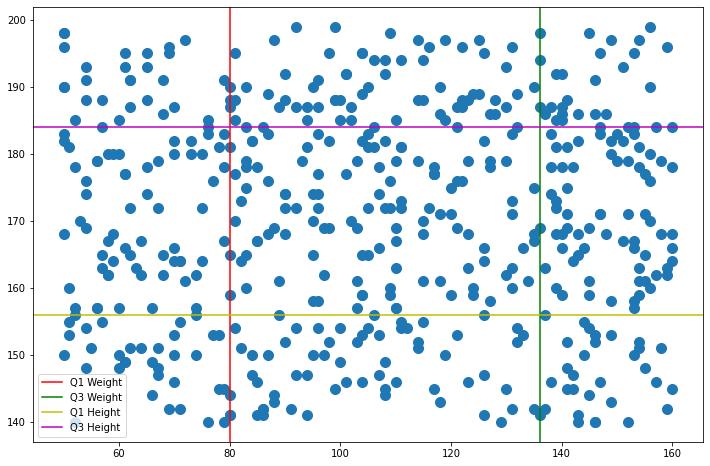

In [50]:
# Scatter Plot representation - If we want to see for both weight and height
plt.figure(figsize = (12,8))
plt.scatter(height_weight_data['Weight'], height_weight_data['Height'], s=100)

# Vertical Lines
plt.axvline(height_weight_data['Weight'].quantile(.25), color = 'r', label = 'Q1 Weight')
plt.axvline(height_weight_data['Weight'].quantile(.75), color = 'g', label = 'Q3 Weight')

# Horizontal Lines
plt.axhline(height_weight_data['Height'].quantile(.25), color = 'y', label = 'Q1 Height')
plt.axhline(height_weight_data['Height'].quantile(.75), color = 'm', label = 'Q3 Height')

plt.legend()

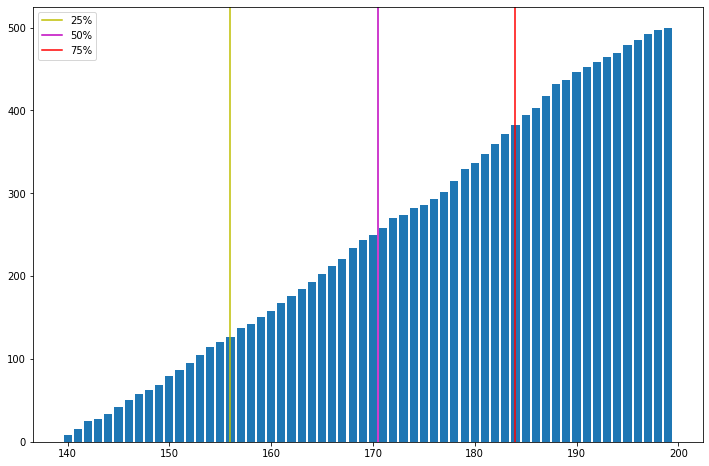

In [51]:
# Bar Graph representation - for quartile information using cumulative count
plt.figure(figsize = (12,8))
plt.bar(height_data['Height'], height_data['cumcounts_height'])

# Vertical Lines
plt.axvline(height_weight_data['Height'].quantile(.25), color = 'y', label = '25%')
plt.axvline(height_weight_data['Height'].quantile(.50), color = 'm', label = '50%')
plt.axvline(height_weight_data['Height'].quantile(.75), color = 'r', label = '75%')

plt.legend()

In [52]:
# Variance
height_var = height_weight_data['Height'].var()
height_var

268.1491623246496

In [53]:
weight_var = height_weight_data['Weight'].var()
weight_var

1048.633266533066

In [54]:
# Standard Deviation
height_std = height_weight_data['Height'].std()
height_std

16.37526067959376

In [55]:
weight_std = height_weight_data['Weight'].std()
weight_std

32.38260746964435

In [56]:
height_weight_data.describe()

,Height,Weight
count,500.000000,500.000000
mean,169.944000,106.000000
std,16.375261,32.382607
min,140.000000,50.000000
25%,156.000000,80.000000
50%,170.500000,106.000000
75%,184.000000,136.000000
max,199.000000,160.000000


<function matplotlib.pyplot.show>

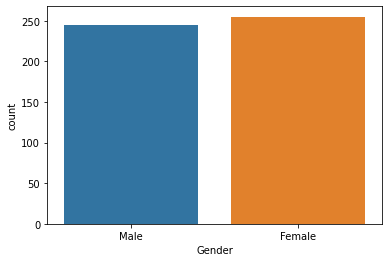

In [57]:
# CountPlot - How amny records are there for each gender in data - To check if its fairly evenly distributed.
sns.countplot(height_weight_data['Gender'])
plt.show

In [58]:
height = height_weight_data['Height']
height.head()

0    174
1    189
2    185
3    195
4    149
Name: Height, dtype: int64

In [59]:
height.shape

(500,)

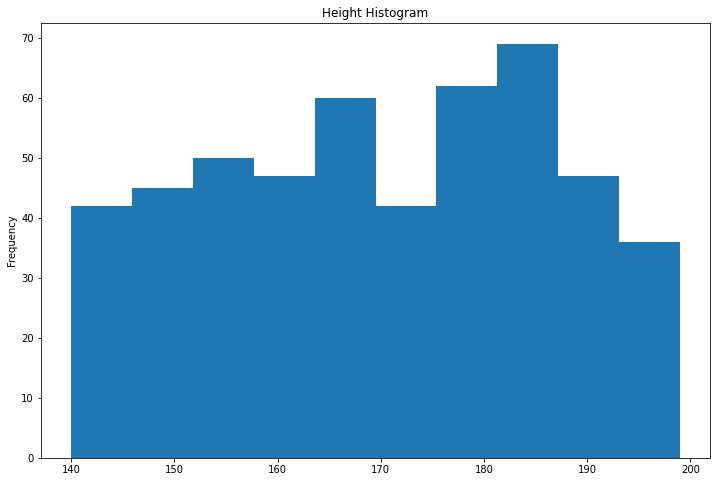

In [60]:
# To check if we find any pattern or distribution
# We may find bell shape normal distribution
plt.figure(figsize = (12,8))
height.plot(kind = 'hist',
            title = 'Height Histogram')

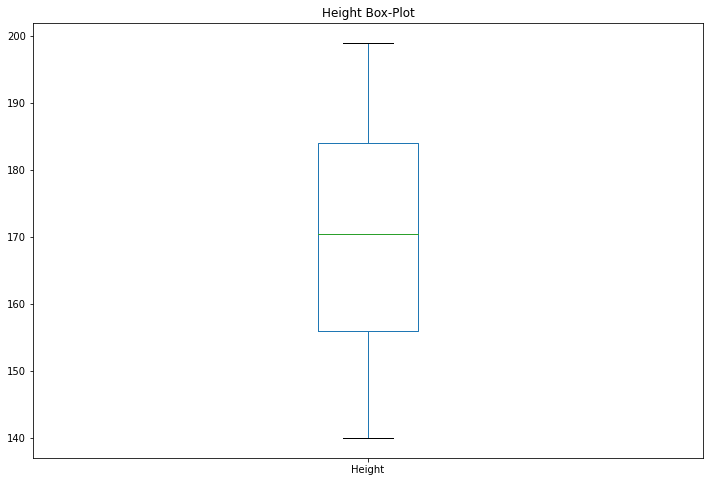

In [61]:
# On of the best to do visualization is Box plot
# Central line is median of Height data
# size of the bix gives us IQR
# We have top and bottom whisker
# Top whisker = Q3 + 1.5 times the IQR 
# Bottom Whisker = Q1 - 1.5 times the IQR
# Points outside the Whiskers can be considered as Outliers
plt.figure(figsize = (12,8))
height.plot(kind = 'box',
            title = 'Height Box-Plot')

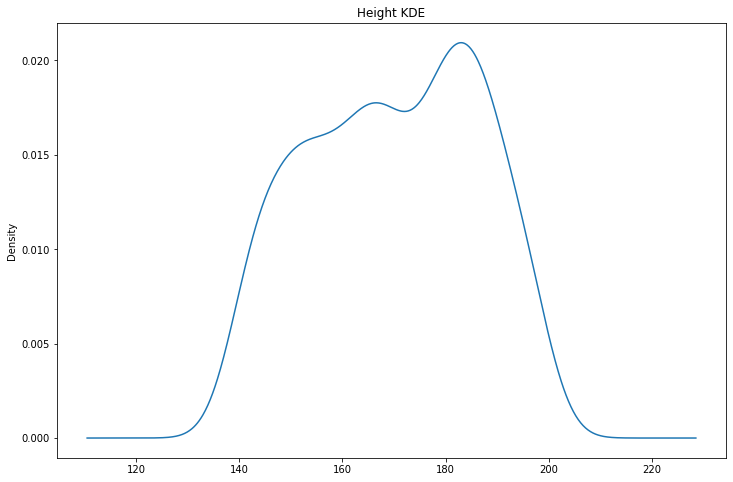

In [62]:
# Probability Distribution Curve - KDE (Kernel Density Estimation) - smooth curve
# Bimodal Distribution - If there are 2 peaks
# 2 peaks may suggest there might be 2 categories or groups present in our data.
height.plot(kind = 'kde',
            title = 'Height KDE', figsize = (12,8))

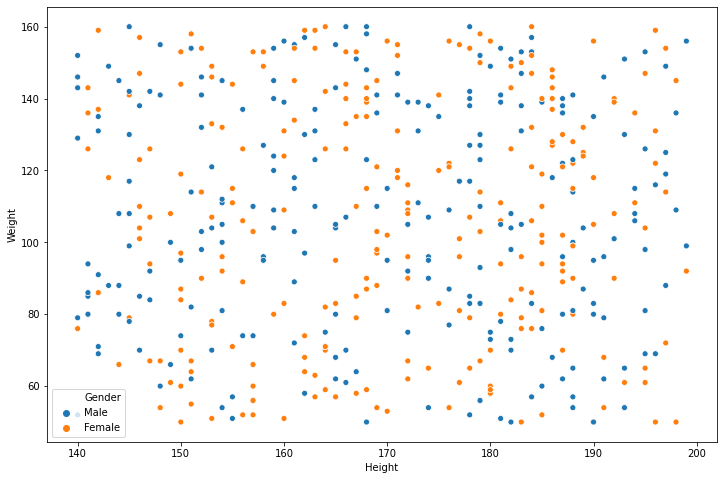

In [63]:
# Scatter plot between height and weight to view if there is any relation between the two. (May be there is some linear Relationship)
plt.figure(figsize = (12,8))
sns.scatterplot(x = 'Height', y = 'Weight', hue = 'Gender', data = height_weight_data)

In [64]:
gender_groupby = height_weight_data.groupby('Gender', as_index = False)
gender_groupby.head()

,Gender,Height,Weight
0,Male,174,96
1,Male,189,87
2,Female,185,110
3,Female,195,104
4,Male,149,61
5,Male,189,104
6,Male,147,92
9,Female,169,103
11,Female,159,80
12,Female,192,101


In [67]:
gender_groupby.describe()

Height                                       ... Weight                           
   count        mean        std    min    25%  ...    min   25%    50%    75%    max
0  255.0  170.227451  15.711825  140.0  157.0  ...   50.0  79.0  106.0  135.0  160.0
1  245.0  169.648980  17.065665  140.0  154.0  ...   50.0  80.0  105.0  137.0  160.0

[2 rows x 16 columns]

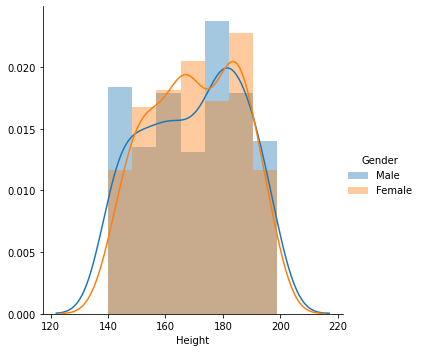

In [68]:
# Distribution plot of height of males and females (Normal Distribution or not)
sns.FacetGrid(height_weight_data, hue = 'Gender', height = 5).map(sns.distplot, 'Height').add_legend()

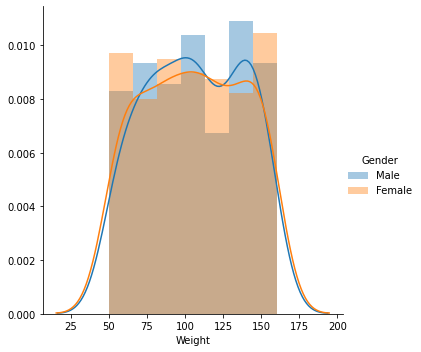

In [70]:
sns.FacetGrid(height_weight_data, hue = 'Gender', height = 5).map(sns.distplot, 'Weight').add_legend()

Skewness and Kurtosis

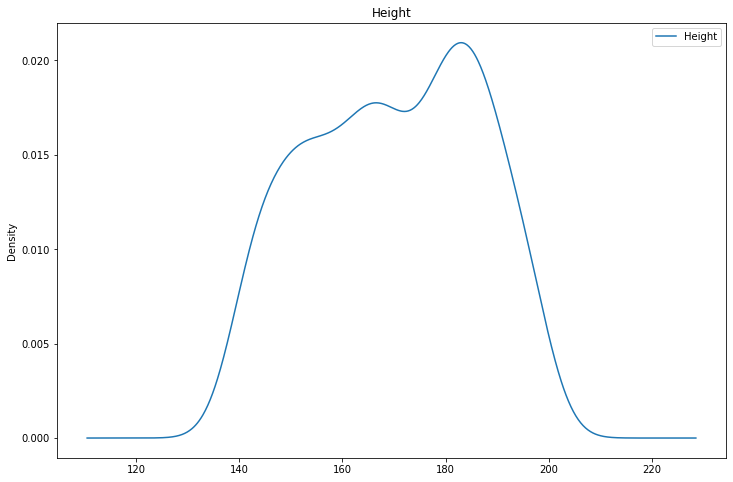

In [72]:
height_weight_data[['Height']].plot(kind = 'kde', title = 'Height', figsize = (12,8))
# Even though it is not like a Normal distribution, still the data is not skewed.

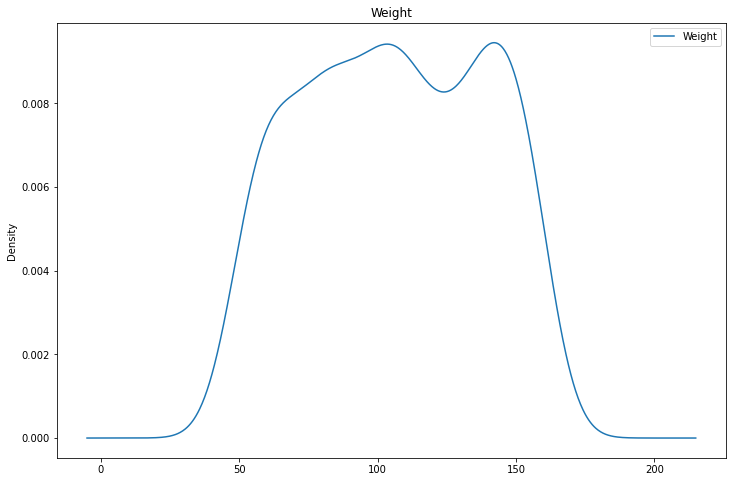

In [73]:
height_weight_data[['Weight']].plot(kind = 'kde', title = 'Weight', figsize = (12,8))
# Even though it is not like a Normal distribution, still the data is not skewed.

In [74]:
# To measure skewness of the data
height_weight_data['Height'].skew()

-0.12191368980139153

In [75]:
height_weight_data['Weight'].skew()

-0.037692236922098034

In [77]:
height_weight_data_updated['Weight'].skew()

3.534959590568174

In [81]:
height_weight_data_updated['Height'].skew()

-0.10205749576278271

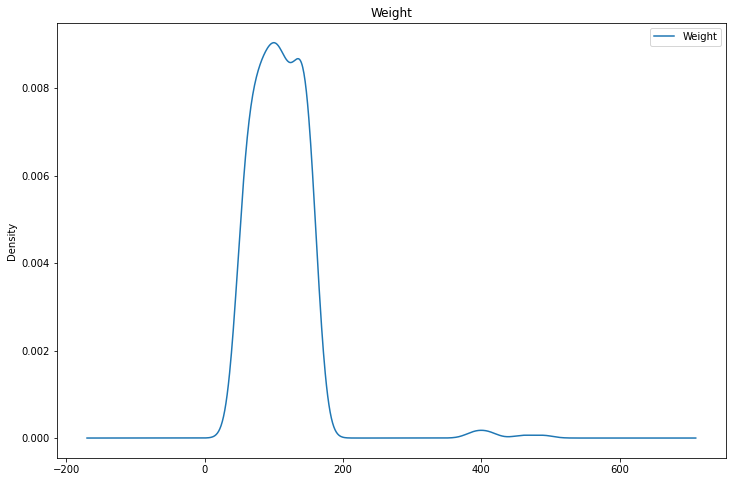

In [78]:
# Data is skewed due to the added outliers
height_weight_data_updated[['Weight']].plot(kind = 'kde', title = 'Weight', figsize = (12,8))

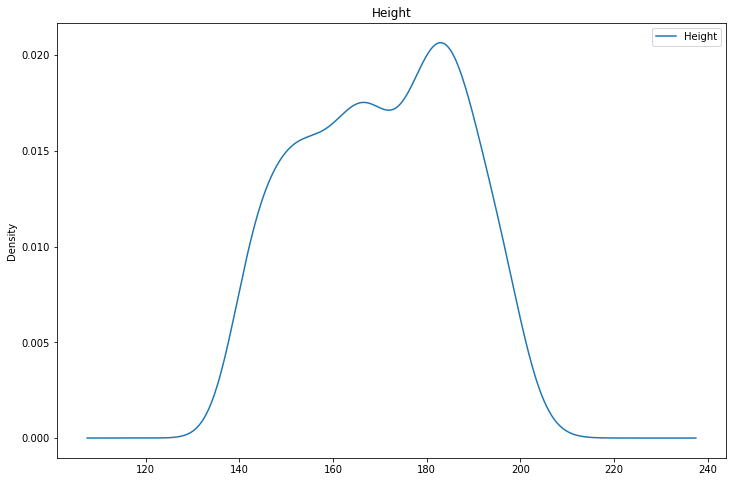

In [80]:
height_weight_data_updated[['Height']].plot(kind = 'kde', title = 'Height', figsize = (12,8))

In [82]:
# Kurtosis < 3 indicates that extreme events are less likely than a normal distribution.
height_weight_data['Height'].kurtosis()

-1.1196709495148123

In [84]:
height_weight_data_updated['Height'].kurtosis()

-1.0934846625791264

In [83]:
height_weight_data['Weight'].kurtosis()

-1.197325403294446

In [85]:
height_weight_data_updated['Weight'].kurtosis()

22.99328186188614